In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [50]:
# #------------------------------------------------------------------------------
# # load data from S1 data file 
# #------------------------------------------------------------------------------
import pickle
from matplotlib import pyplot as plt
# #cfg.recordLFP =  [[210, y, 210] for y in [200, 1000, 1200, 1400]]

 
# #------------------------------------------------------------------------------
with open('../data/v8_batch0/v8_batch0_data.pkl', 'rb') as fileObj: spikesData = pickle.load(fileObj)
spkid = spikesData['simData']['spkid']
spkt = spikesData['simData']['spkt']

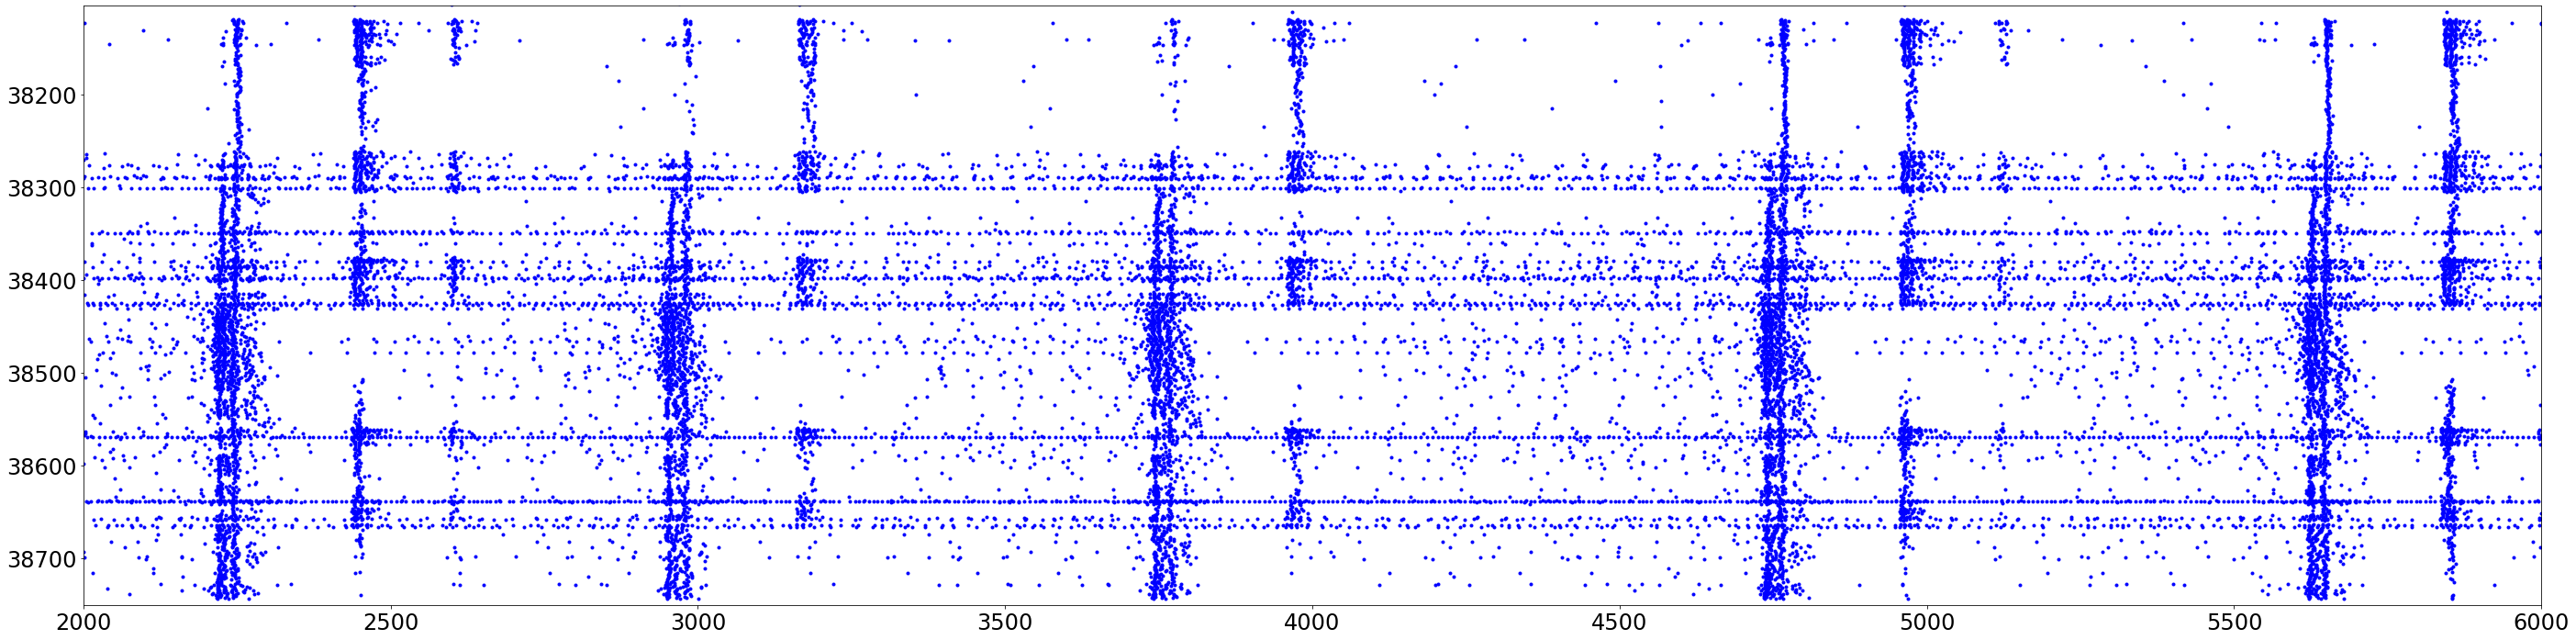

In [51]:
plt.figure(figsize=(48,12))
fontSize = 24
lw = 2
plt.plot(spkt,spkid,'.b')
plt.ylim(38750,38105)
plt.xlim(2000, 6000)
plt.xticks(fontsize = fontSize)
plt.yticks(fontsize = fontSize)
plt.show()

In [52]:
# #------------------------------------------------------------------------------
with open('../data/v8_batch1/v8_batch1_data.pkl', 'rb') as fileObj: spikesData = pickle.load(fileObj)
spkid = spikesData['simData']['spkid']
spkt = spikesData['simData']['spkt']

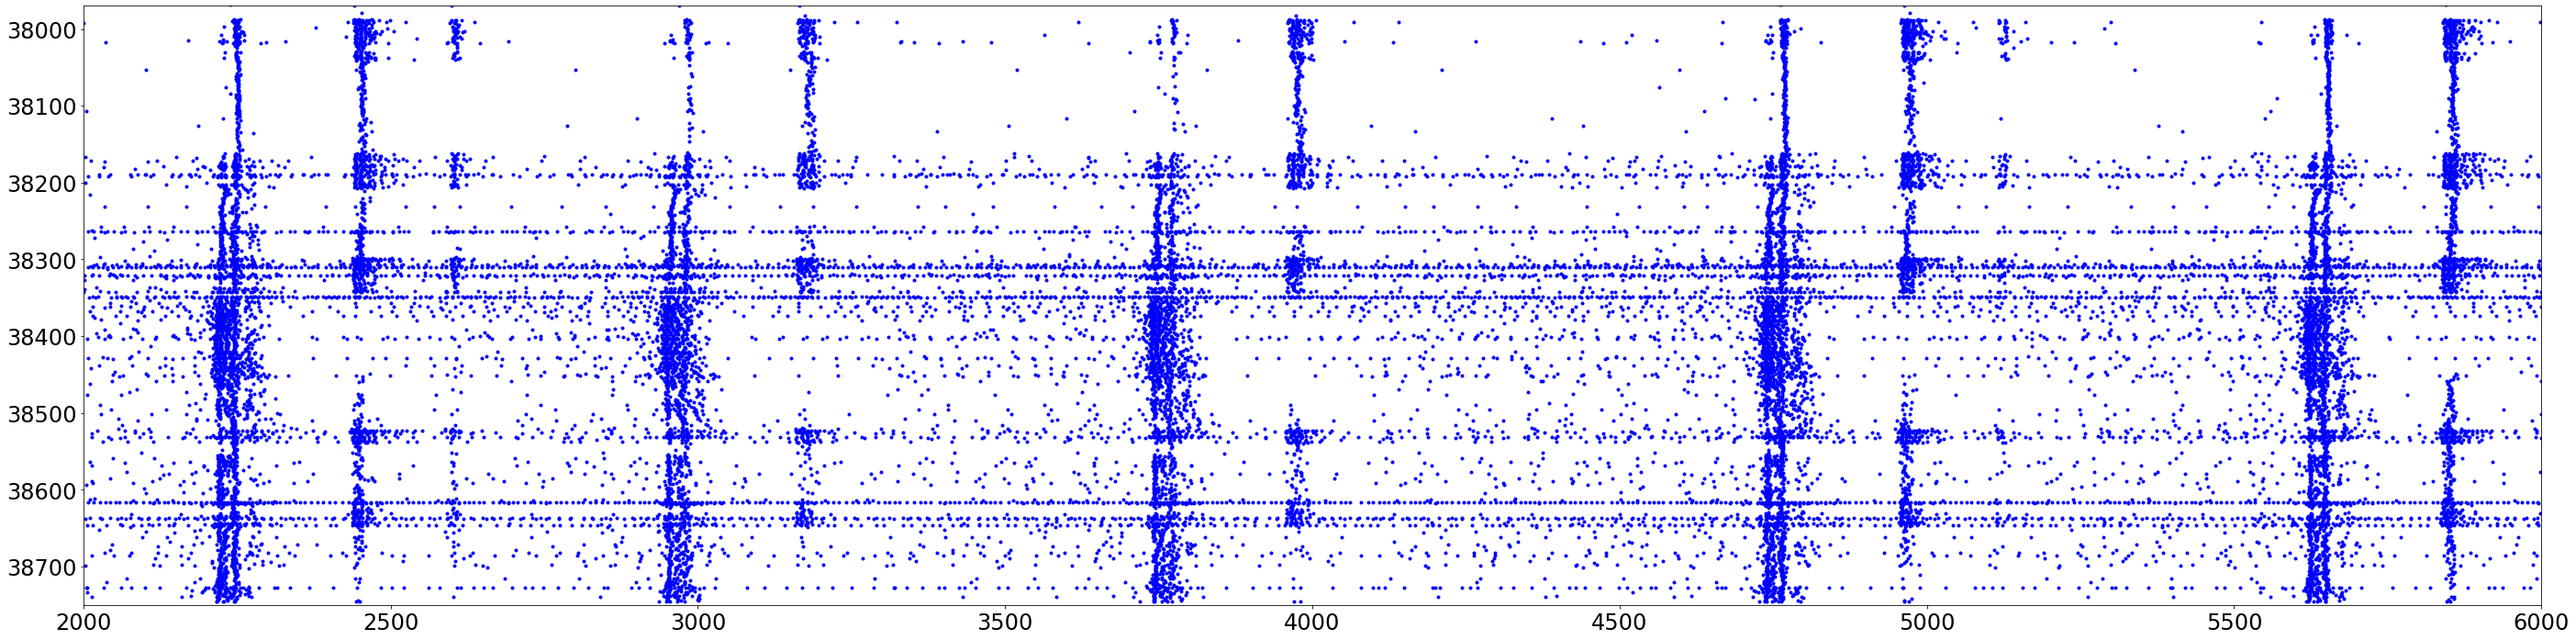

In [53]:
plt.figure(figsize=(48,12))
fontSize = 24
lw = 2
plt.plot(spkt,spkid,'.b')
plt.ylim(38750,37970)
plt.xlim(2000, 6000)
plt.xticks(fontsize = fontSize)
plt.yticks(fontsize = fontSize)
plt.show()

In [54]:
# #------------------------------------------------------------------------------
with open('../data/v8_batch2/v8_batch2_data.pkl', 'rb') as fileObj: spikesData = pickle.load(fileObj)
spkid = spikesData['simData']['spkid']
spkt = spikesData['simData']['spkt']

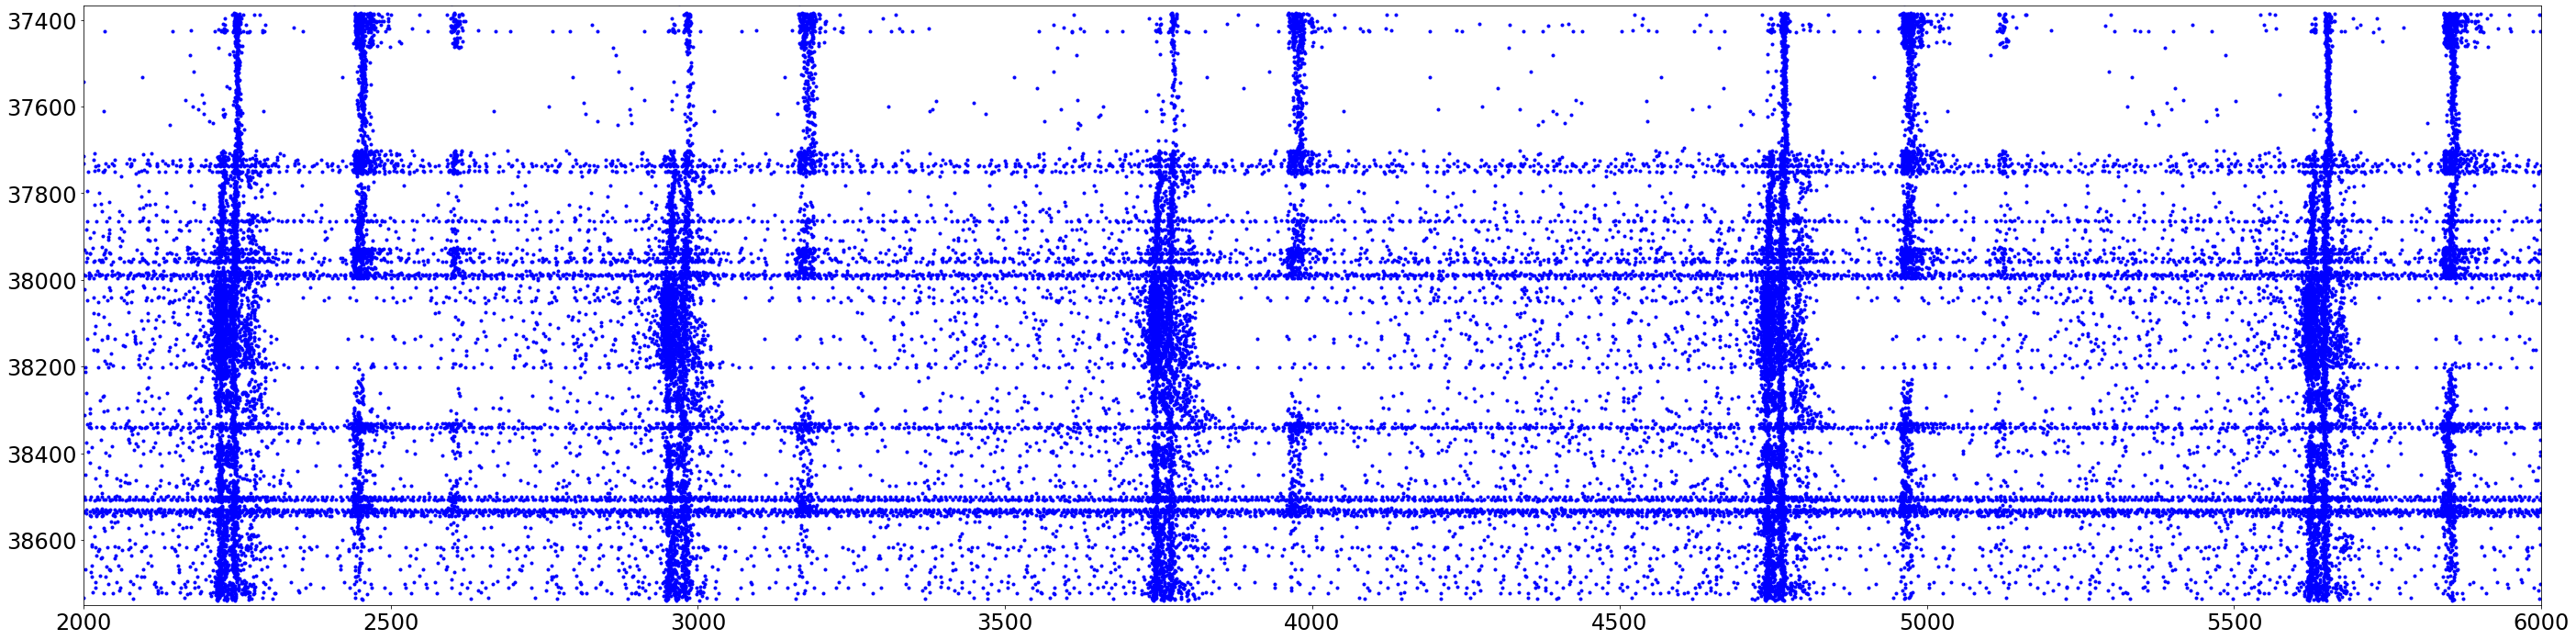

In [55]:
plt.figure(figsize=(48,12))
fontSize = 24
lw = 2
plt.plot(spkt,spkid,'.b')
plt.ylim(38750,37368)
plt.xlim(2000, 6000)
plt.xticks(fontsize = fontSize)
plt.yticks(fontsize = fontSize)
plt.show()

In [56]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import IPython as ipy
import pickle as pkl
import scipy.signal as ss


poptypeNumber = 61 # max 55 + 6
celltypeNumber = 213 # max 207 + 6

# TO DEBUG - import and simulate only the Cell soma (to study only the Net)
reducedtest = False    

#------------------------------------------------------------------------------  
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('../info/anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
popParam = []
cellParam = []
meParamLabels = {} 
popLabelEl = {} 
cellLabel = {}

RP_L13 = []
RP_L45 = []
RP_L6 = []

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popNumber[mtype] = int(m)
    cellLabel[metype] = cellname

    if mtype not in popParam:
        popParam.append(mtype)
        popLabelEl[mtype] = [] 
               
    popLabelEl[mtype].append(metype)
    
    cellParam.append(mtype + '_' + etype[0:3])

    layernumber = float(metype[1:2])
    if cellNumber[metype]*0.01 > 1.0:
        if int(layernumber) <= 3:
            RP_L13.append(mtype + '_' + etype[0:3])
#             print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        elif int(layernumber) == 6:
            RP_L6.append(mtype + '_' + etype[0:3])
#             print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        else:
            RP_L45.append(mtype + '_' + etype[0:3])
#             print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
    
S1pops = popParam[0:55]
S1cells = cellParam[0:207]

## Solved the errors in saved LFP file

In [58]:
import numpy as npd

In [88]:
np.shape(spikesData['simData']['LFP'])

(60000, 4)

(-0.5, 0.1)

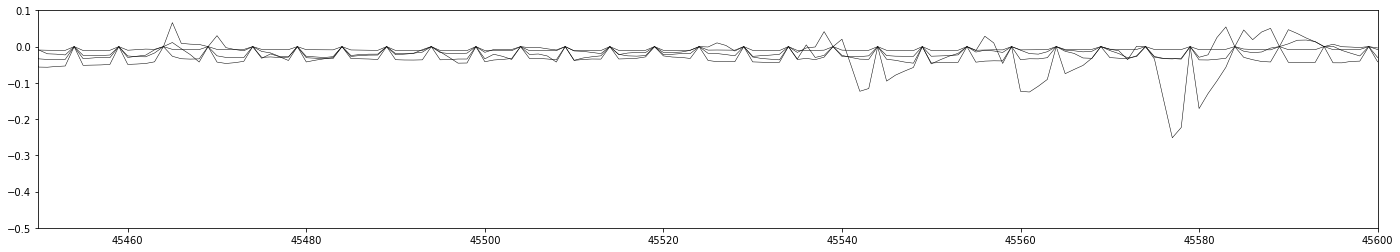

In [60]:
# np.shape(spikesData['simData']['LFP'])
plt.figure(figsize=(24,4))
fontSize = 12
lw = 1

plt.plot(spikesData['simData']['LFP'], 'k-', linewidth=0.5, label='input')
plt.xlim(45450,45600)
plt.ylim(-0.5,0.1)

In [90]:
V = {}
for el in range(4):
    V[el] = []
Vm = []

for t in range(20000-1,60000-1):
    vmt = 0
    for el in range(4):
        if abs(spikesData['simData']['LFP'][t][el]) < 0.001:
            xt = (spikesData['simData']['LFP'][t-1][el]+spikesData['simData']['LFP'][t+1][el])/2.0
            V[el].append(xt)            
            if el >= 1:
                vmt += xt/3
        else:
            V[el].append(spikesData['simData']['LFP'][t][el])            
            if el >= 1:
                vmt += spikesData['simData']['LFP'][t][el]/3
    Vm.append(vmt)

In [91]:
timeRange = [2000, 6000]
recordStep = 0.1
t = np.arange(timeRange[0], timeRange[1], recordStep) 

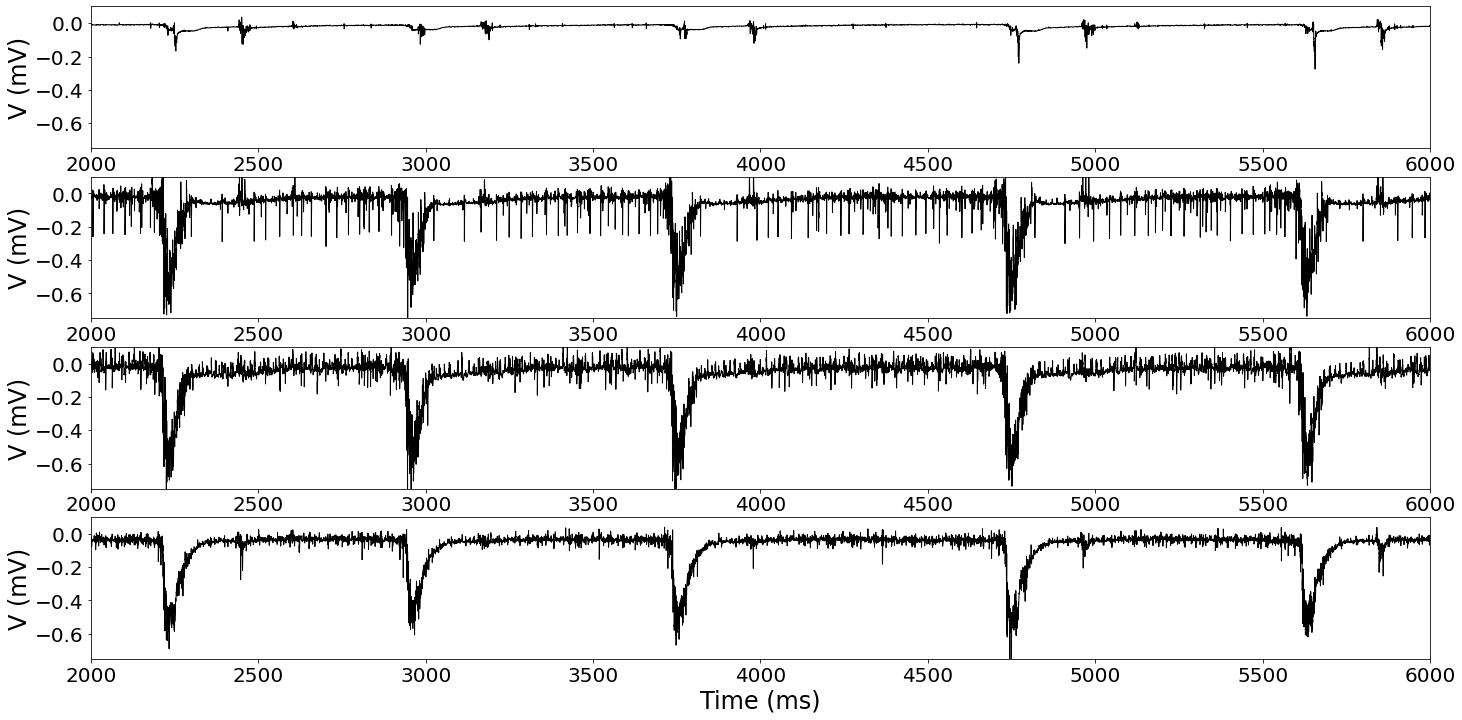

In [92]:
plt.figure(figsize=(24,12))
fontSize = 24
lw = 1

plt.title('S1 model', fontsize=24)
for el in range(4):
    plt.subplot(4, 1, el+1)
    plt.plot(t,V[el],'k', linewidth=lw) #, color=color)
# plt.plot(t,Vm,'b-', linewidth=2.5*lw) #, color=color)
    plt.xlim(2000,6000)
    plt.ylabel('V (mV)', fontsize=fontSize)
    plt.ylim(-0.75,0.1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Time (ms)', fontsize=fontSize)

plt.show()

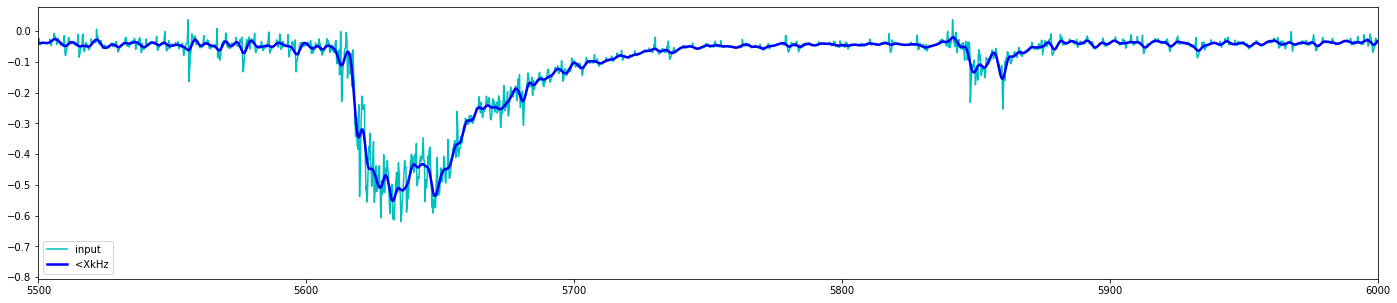

In [113]:
# Now create a lowpass Butterworth filter with a cutoff of 0.2 times the Nyquist frequency, or 2000 Hz, and apply it to x with filtfilt
plt.figure(figsize=(24,5))
fontSize = 12
lw = 1

fs = 1000/recordStep
x = V[3]

b, a = ss.butter(4, 0.050)
y = ss.filtfilt(b, a, x, padlen=100)
plt.plot(t,x, 'c-', linewidth=1.5, label='input')
plt.plot(t,y, 'b-', linewidth=2.5, label='<XkHz')

# b, a = ss.ellip(4, 0.01, 120, 0.125)  # Filter to be applied.
# fgust = ss.filtfilt(b, a, x, method="gust")
# fpad = ss.filtfilt(b, a, x, padlen=50)
# plt.plot(t,fgust, 'b-', linewidth=0.5, label='gust')
# plt.plot(t,fpad, 'c-', linewidth=0.5, label='pad')
plt.xlim(5500,6000)
plt.legend(loc='best')
plt.show()


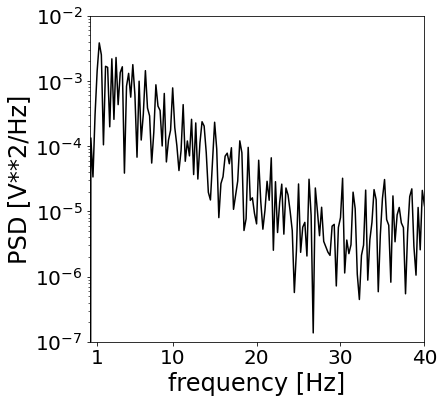

In [94]:
plt.figure(figsize=(6,6))
fontSize = 12

fs = 1000/recordStep

x = V[3]
f, Pxx_den = ss.periodogram(x, fs)
plt.semilogy(f, Pxx_den,'k')

# b, a = ss.butter(4, 0.200)
# y = ss.filtfilt(b, a, x, padlen=100)

# f, Pxx_den = ss.periodogram(y, fs)
# plt.semilogy(f, Pxx_den)


plt.ylim([1e-7, 1e-2])
plt.xlim([0.1, 40])
plt.xlabel('frequency [Hz]', fontsize=24)
plt.ylabel('PSD [V**2/Hz]', fontsize=24)
plt.yticks(fontsize = 20)
plt.xticks([1,10,20, 30,40], fontsize=20);

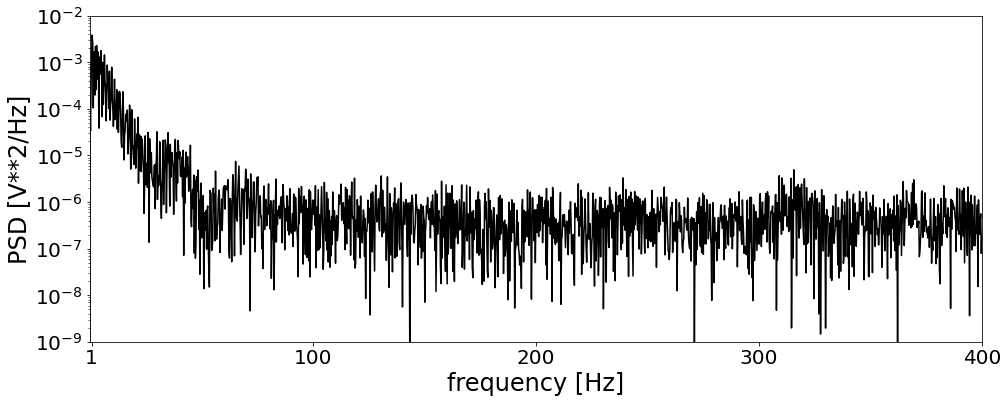

In [95]:
plt.figure(figsize=(16,6))
fontSize = 12

fs = 1000/recordStep

x = V[3]
f, Pxx_den = ss.periodogram(x, fs)
plt.semilogy(f, Pxx_den,'k')

# b, a = ss.butter(4, 0.200)
# y = ss.filtfilt(b, a, x, padlen=100)

# f, Pxx_den = ss.periodogram(y, fs)
# plt.semilogy(f, Pxx_den)


plt.ylim([1e-9, 1e-2])
plt.xlim([0.1, 400])
plt.xlabel('frequency [Hz]', fontsize=24)
plt.ylabel('PSD [V**2/Hz]', fontsize=24)
plt.yticks(fontsize = 20)
plt.xticks([1,100,200, 300,400], fontsize=20);

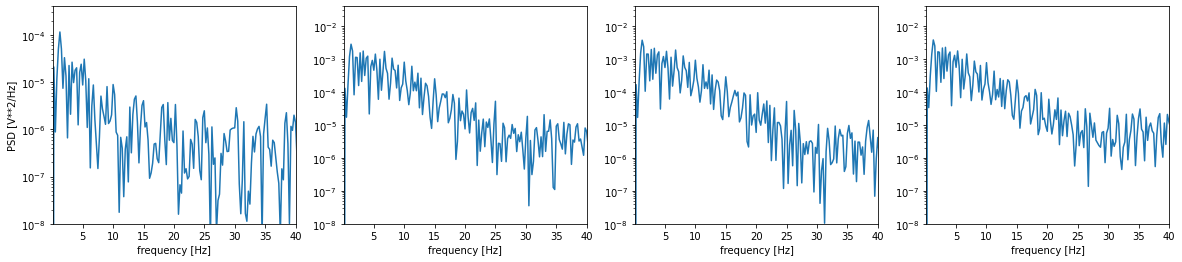

In [96]:
plt.figure(figsize=(20,4))
fontSize = 12

fs = 1000/recordStep

for ii in range(4):
    plt.subplot(1, 4, ii+1)
    x = V[ii]
    b, a = ss.butter(4, 0.200)
    y = ss.filtfilt(b, a, x, padlen=100)
    
    f, Pxx_den = ss.periodogram(y, fs)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-8, 4e-2])
    plt.xlim([0.1, 40])
    plt.xlabel('frequency [Hz]')
    if ii==0:
        plt.ylabel('PSD [V**2/Hz]')
        plt.ylim([1e-8, 4e-4])
    else:
        plt.ylabel('')

plt.show()

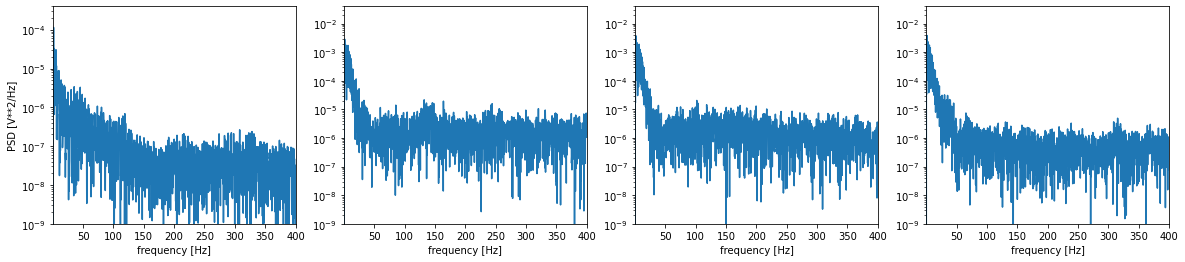

In [97]:
plt.figure(figsize=(20,4))
fontSize = 12

fs = 1000/recordStep

for ii in range(4):
    plt.subplot(1, 4, ii+1)
    x = V[ii]
    b, a = ss.butter(4, 0.200)
    y = ss.filtfilt(b, a, x, padlen=100)
    f, Pxx_den = ss.periodogram(y, fs)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-9, 4e-2])
    plt.xlim([0.2, 400])
    plt.xlabel('frequency [Hz]')
    if ii==0:
        plt.ylabel('PSD [V**2/Hz]')
        plt.ylim([1e-9, 4e-4])
    else:
        plt.ylabel('')

plt.show()

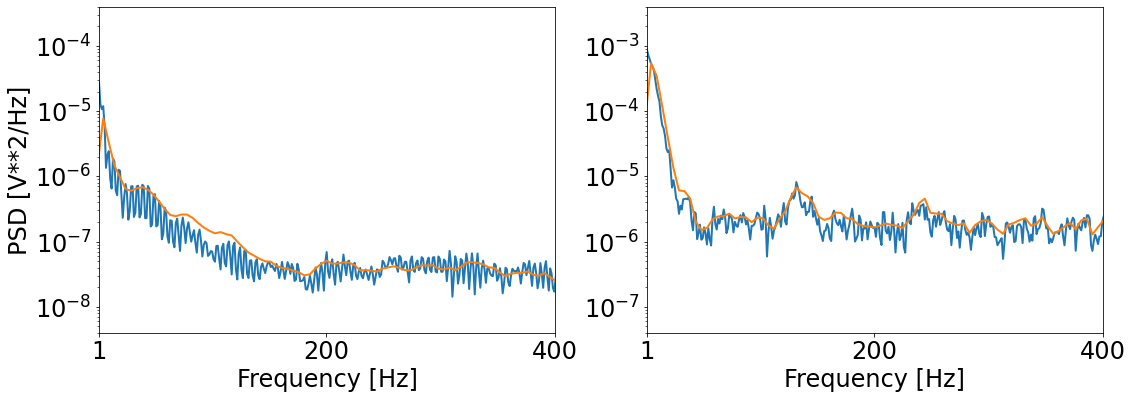

In [98]:
plt.figure(figsize=(18,6))
fontSize = 24
lw = 2

plt.subplot(1, 2, 1)
fs = 1000/recordStep
x = V[0]
f, Pxx_den = ss.welch(x, fs, nperseg=8*1024)
plt.semilogy(f, Pxx_den, linewidth=2)
f, Pxx_den = ss.welch(x, fs, nperseg=4*512)
plt.semilogy(f, Pxx_den, linewidth=2)
plt.ylim(0.4e-8, 4e-4)
plt.xlim(1, 100)
plt.xlabel('Frequency [Hz]', fontsize = fontSize)
plt.ylabel('PSD [V**2/Hz]', fontsize = fontSize)
plt.xticks([1,200,400], fontsize = fontSize)
plt.yticks(fontsize = fontSize)

plt.subplot(1, 2, 2)
fs = 1000/recordStep
x = V[1]
f, Pxx_den = ss.welch(x, fs, nperseg=8*1024)
plt.semilogy(f, Pxx_den, linewidth=2)
f, Pxx_den = ss.welch(x, fs, nperseg=4*512)
plt.semilogy(f, Pxx_den, linewidth=2)
plt.ylim(0.4e-7, 4e-3)
plt.xlim(1, 100)
plt.xlabel('Frequency [Hz]', fontsize = fontSize)
plt.ylabel('', fontsize = fontSize)
plt.xticks([1,200,400], fontsize = fontSize)
plt.yticks(fontsize = fontSize)

plt.show()

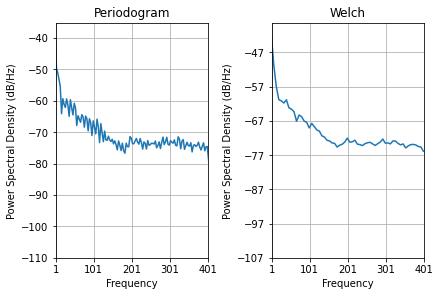

In [99]:
import matplotlib.mlab as mlab

fs = 10000
x = V[0]

fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
xticks = np.arange(1, 402, 100)
xrange = (xticks[0], xticks[-1])


ax0.psd(x, NFFT=3001, Fs=fs, window=mlab.window_none,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_xticks(xticks)
ax0.set_xlim(xrange)

ax1.psd(x, NFFT=1500, Fs=fs, window=mlab.window_none, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_xlim(xrange)

plt.show()

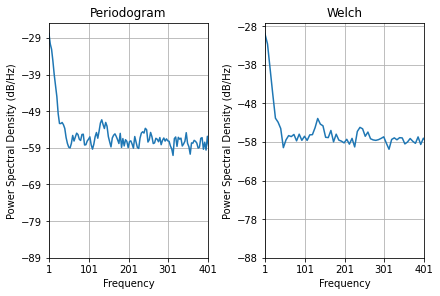

In [100]:
import matplotlib.mlab as mlab

fs = 10000
x = V[1]

fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
xticks = np.arange(1, 402, 100)
xrange = (xticks[0], xticks[-1])


ax0.psd(x, NFFT=3001, Fs=fs, window=mlab.window_none,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_xticks(xticks)
ax0.set_xlim(xrange)

ax1.psd(x, NFFT=1500, Fs=fs, window=mlab.window_none, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_xlim(xrange)

plt.show()